In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

In [51]:
len(os.listdir('C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/train'))

25000

In [9]:
for i in os.listdir('C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/train'):
    if 'cat' in i:
        shutil.copyfile('C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/train/'+i, 'C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/train_cat/'+i)
    if 'dog' in i:
        shutil.copyfile('C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/train/'+i, 'C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/train_dog/'+i)
print(len(os.listdir('C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/train_cat')))
print(len(os.listdir('C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/train_dog')))

12500
12500


In [89]:
# train data
train_ds = tf.keras.preprocessing.image_dataset_from_directory('C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/dataset/',
                                                              image_size = (64, 64),
                                                              batch_size = 64,
                                                              subset = 'training',
                                                              validation_split = 0.2,
                                                              seed = 1234)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [90]:
# test data
val_ds = tf.keras.preprocessing.image_dataset_from_directory('C:/jupyter_home/pythonSource/appSource/AI/DeepLearning/dataset/',
                                                              image_size = (64,64),
                                                              batch_size = 64,
                                                              subset = 'validation',
                                                              validation_split = 0.2,
                                                              seed = 1234)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [91]:
def 전처리함수(i, 정답):
    i = tf.cast(i/255.0, tf.float32)
    return i, 정답

In [92]:
train_ds = train_ds.map(전처리함수)
train_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [93]:
val_ds = train_ds.map(전처리함수)
val_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [94]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

정답
 tf.Tensor(
[1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1], shape=(64,), dtype=int32)
i
 tf.Tensor(
[[[[0.08425054 0.02934857 0.02542701]
   [0.0788603  0.02395833 0.02003676]
   [0.09209559 0.04895834 0.03327206]
   ...
   [0.06710516 0.02360026 0.00803654]
   [0.07450981 0.01960784 0.01568628]
   [0.00392923 0.00803654 0.00392923]]

  [[0.1010972  0.0501168  0.02658739]
   [0.119267   0.06828661 0.0447572 ]
   [0.06590265 0.03845167 0.01492226]
   ...
   [0.07071079 0.02720588 0.01164216]
   [0.06977443 0.01487247 0.0109509 ]
   [0.00349839 0.01146408 0.00509153]]

  [[0.09571078 0.04473039 0.01335784]
   [0.09761029 0.0466299  0.01525735]
   [0.07900965 0.066142   0.03922909]
   ...
   [0.07178692 0.02703546 0.01188726]
   [0.0753753  0.02147863 0.01722197]
   [0.00857843 0.01602137 0.00982307]]

  ...

  [[0.3947572  0.32857114 0.24108073]
   [0.46586245 0.3835095  0.26279873]
   [0.5416322  0.46

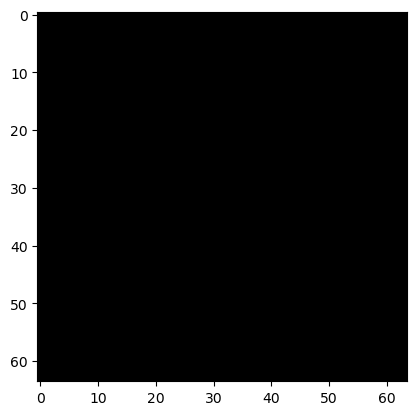

In [95]:
for i, 정답 in train_ds.take(1):
    print('정답\n', 정답)
    print('i\n', i)
    plt.imshow(i[0].numpy().astype('uint8'))
    plt.show()

In [83]:
model=tf.keras.Sequential([
     tf.keras.layers.Conv2D(32,(3,3),padding="same",activation='relu',input_shape=(64,64,3)), # ---- 64 * 64 이미지에 RGB 3색이므로 64 64 3
     tf.keras.layers.MaxPooling2D((2,2)),
     tf.keras.layers.Conv2D(64,(3,3),padding="same",activation='relu'),
     tf.keras.layers.MaxPooling2D((2,2)),
     tf.keras.layers.Dropout(0.2), # ---- 20% 미만 데이터 제거 = 과적합 방지
     tf.keras.layers.Conv2D(128,(3,3),padding="same",activation='relu'), 
     tf.keras.layers.MaxPooling2D((2,2)),    
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation='relu'), 
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [96]:
model

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)      

In [98]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
model.fit(train_ds, validation_data = val_ds, epochs=5)

Epoch 1/5
313/313 [==============================] - 98s 308ms/step - loss: 0.3037 - accuracy: 0.8694 - val_loss: 1.0169 - val_accuracy: 0.4997
Epoch 2/5
313/313 [==============================] - 96s 307ms/step - loss: 0.2697 - accuracy: 0.8860 - val_loss: 0.9566 - val_accuracy: 0.4997
Epoch 3/5
313/313 [==============================] - 93s 295ms/step - loss: 0.2383 - accuracy: 0.9024 - val_loss: 0.9330 - val_accuracy: 0.4997
Epoch 4/5
313/313 [==============================] - 93s 297ms/step - loss: 0.2064 - accuracy: 0.9155 - val_loss: 0.7611 - val_accuracy: 0.4997
Epoch 5/5
313/313 [==============================] - 93s 298ms/step - loss: 0.1822 - accuracy: 0.9262 - val_loss: 1.2387 - val_accuracy: 0.4997
